<a href="https://colab.research.google.com/github/rkarpin/ML_LAB/blob/main/ML_homework_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
from matplotlib import pyplot

trainset = torchvision.datasets.MNIST(root='./data',
                                      train=True,
                                      download=True,
                                      transform=None)

100%|██████████| 9.91M/9.91M [00:00<00:00, 54.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.55MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 11.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.21MB/s]


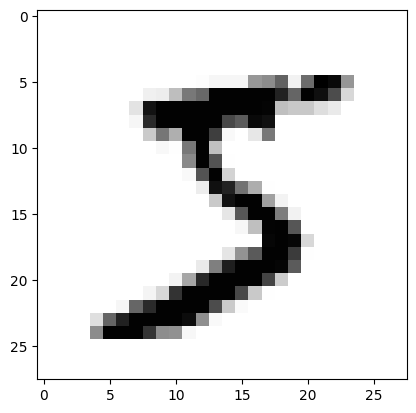

In [3]:
train_image, train_target = trainset[0]
pyplot.imshow(train_image, cmap='Grays')
pyplot.show()

In [4]:

(trainset.data.numpy().mean()/255.0, trainset.data.numpy().std()/255.0)

(np.float64(0.1306604762738429), np.float64(0.30810780385646264))

In [5]:

transform = torchvision.transforms.Compose(
    [ torchvision.transforms.ToTensor(), #Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
      torchvision.transforms.Normalize((0.1307), (0.3081))])

trainset = torchvision.datasets.MNIST(root='./data',
                                      train=True,
                                      download=True,
                                      transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=2048,
                                          shuffle=True)   #we do shuffle it to give more randomizations to training epochs

testset = torchvision.datasets.MNIST(root='./data',
                                     train=False,
                                     download=True,
                                     transform=transform)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=1,
                                         shuffle=False)


In [6]:

for i, data in enumerate(trainloader):
        batch_inputs, batch_labels = data

        if i<5:
            print(i, "-th batch labels :", batch_labels)


0 -th batch labels : tensor([4, 9, 1,  ..., 7, 7, 3])
1 -th batch labels : tensor([1, 8, 8,  ..., 3, 9, 2])
2 -th batch labels : tensor([2, 7, 3,  ..., 1, 9, 6])
3 -th batch labels : tensor([3, 2, 5,  ..., 4, 1, 8])
4 -th batch labels : tensor([3, 8, 9,  ..., 1, 6, 9])


In [7]:
for i, data in enumerate(trainloader):
        batch_inputs, batch_labels = data

        if i==0:
            print(i, "-th batch inputs :", batch_inputs)


0 -th batch inputs : tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
     

In [8]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()

        # fully-connected layers
        self.fc1 = nn.Linear(28 * 28, 1024)
        self.fc2 = nn.Linear(1024, 2048)
        self.fc3 = nn.Linear(2048, 256)
        self.fc4 = nn.Linear(256, 10)

        # activations and regularisation
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.05)

    def forward(self, x):
        x = self.flatten(x)

        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))

        x = self.fc4(x)
        x = self.dropout(x)

        return x

In [9]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Working on {device}")

net = MLP().to(device)
optimizer = torch.optim.Adam(net.parameters(), 0.001)   #initial and fixed learning rate of 0.001.

net.train()    #it notifies the network layers (especially batchnorm or dropout layers, which we don't use in this example) that we are doing traning
for epoch in range(8):  #  an epoch is a training run through the whole data set

    for batch, data in enumerate(trainloader):
        batch_inputs, batch_labels = data

        batch_inputs = batch_inputs.to(device)  #explicitly moving the data to the target device
        batch_labels = batch_labels.to(device)

        #batch_inputs.squeeze(1)     #alternatively if not for a Flatten layer, squeeze() could be used to remove the second order of the tensor, the Channel, which is one-dimensional (this index can be equal to 0 only)

        optimizer.zero_grad()

        batch_outputs = net(batch_inputs)   #this line calls the forward(self, x) method of the MLP object. Please note, that the last layer of the MLP is linear
                                            #and MLP doesn't apply
                                            #the nonlinear activation after the last layer
        loss = torch.nn.functional.cross_entropy(batch_outputs, batch_labels, reduction = "mean") #instead, nonlinear softmax is applied internally in THIS loss function
        print("epoch:", epoch, "batch:", batch, "current batch loss:", loss.item())
        loss.backward()       #this computes gradients as we have seen in previous workshops
        optimizer.step()     #but this line in fact updates our neural network.
                                ####You can experiment - comment this line and check, that the loss DOE

Working on cpu
epoch: 0 batch: 0 current batch loss: 2.305279016494751
epoch: 0 batch: 1 current batch loss: 2.06361722946167
epoch: 0 batch: 2 current batch loss: 1.6249520778656006
epoch: 0 batch: 3 current batch loss: 1.1543160676956177
epoch: 0 batch: 4 current batch loss: 1.1045469045639038
epoch: 0 batch: 5 current batch loss: 1.004981517791748
epoch: 0 batch: 6 current batch loss: 0.9835841059684753
epoch: 0 batch: 7 current batch loss: 0.6676197052001953
epoch: 0 batch: 8 current batch loss: 0.7390791773796082
epoch: 0 batch: 9 current batch loss: 0.7278808951377869
epoch: 0 batch: 10 current batch loss: 0.5504434704780579
epoch: 0 batch: 11 current batch loss: 0.5295518636703491
epoch: 0 batch: 12 current batch loss: 0.5081865191459656
epoch: 0 batch: 13 current batch loss: 0.5111961364746094
epoch: 0 batch: 14 current batch loss: 0.460981160402298
epoch: 0 batch: 15 current batch loss: 0.41956573724746704
epoch: 0 batch: 16 current batch loss: 0.3812800347805023
epoch: 0 batc

In [10]:
good = 0
wrong = 0

net.eval()
with torch.no_grad():
    for batch, data in enumerate(testloader):
        datapoint, label = data

        device = next(net.parameters()).device
        datapoint = datapoint.to(device)
        label = label.to(device)

        prediction = net(datapoint)
        classification = torch.argmax(prediction)

        if classification.item() == label.item():
            good += 1
        else:
            wrong += 1

print("accuracy = ", good / (good + wrong))

accuracy =  0.9798


# Zadanie 1

Obrazy nie przypominają prawdziwych cyfr (chociaż jak zmrużę oczy to widzę podobieństwo przy niektórych cyfrach), dzieje się tak, bo obrazy są zaszumione.

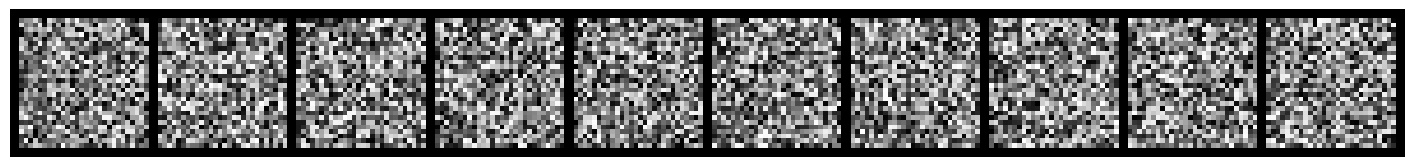

0 0.012573819607496262
1 0.04167037457227707
2 0.0464329794049263
3 0.640444815158844
4 0.003244901541620493
5 0.0314939022064209
6 0.014991199597716331
7 0.08842584490776062
8 0.01415532547980547
9 0.0454847626388073


In [11]:
import  matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torch.nn.functional as F

images = torch.rand(10, 1, 28, 28)
grid = make_grid(images, nrow=10, padding=2, normalize=True)
plt.figure(figsize=(18, 3))
plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap='gray')
plt.axis('off')
plt.show()

device = next(net.parameters()).device
probs = F.softmax(net(images.to(device)), dim=1).cpu()

for i in range(10):
    print(i, probs[i, i].item())

In [12]:
criterion = nn.CrossEntropyLoss()


targets = torch.tensor([0,1,2,3,4,5,6,7,8,9],
                       dtype=torch.long,
                       device=device)




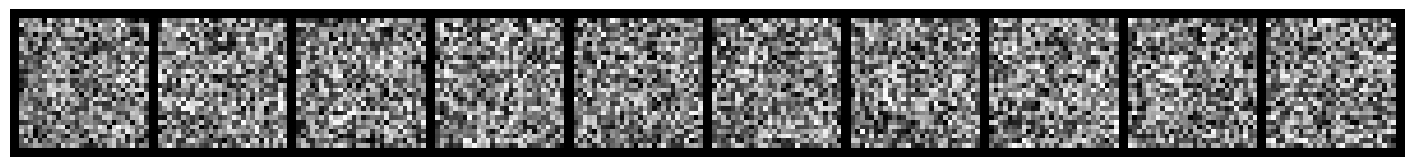

0 0.18807552754878998
1 0.2573387324810028
2 0.6015043258666992
3 0.9923426508903503
4 0.10540547966957092
5 0.8698132634162903
6 0.529445469379425
7 0.6258564591407776
8 0.1125805675983429
9 0.6117803454399109
Loss: 3.423199415206909
 


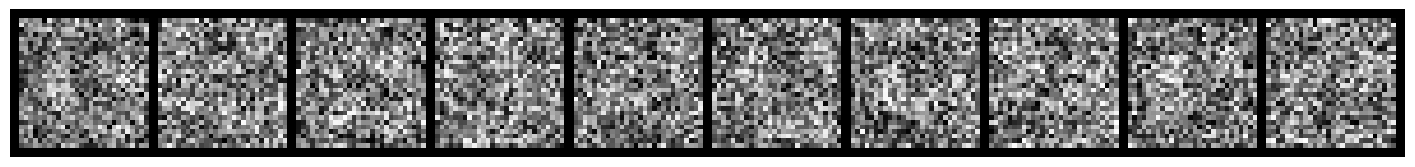

0 0.7633258700370789
1 0.6744310259819031
2 0.9631972312927246
3 0.9994268417358398
4 0.6955412030220032
5 0.9844124913215637
6 0.9332921504974365
7 0.9482138752937317
8 0.3894169330596924
9 0.922361433506012
Loss: 0.9713727235794067
 


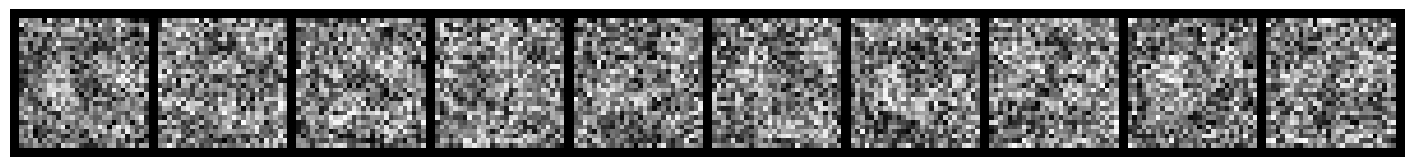

0 0.958914577960968
1 0.9254734516143799
2 0.9954869151115417
3 0.9999223947525024
4 0.9712545275688171
5 0.9956654906272888
6 0.9904459714889526
7 0.9930536150932312
8 0.7511714696884155
9 0.9772807955741882
Loss: 0.22269368171691895
 


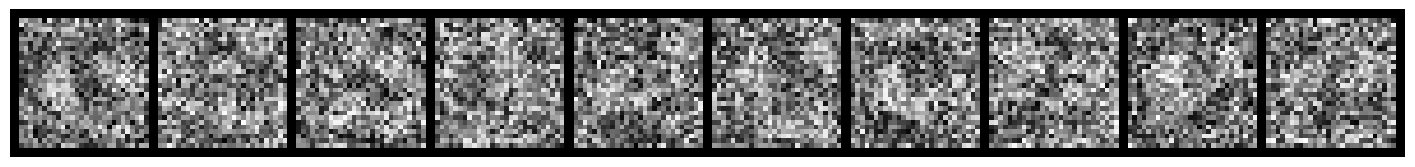

0 0.99153733253479
1 0.9834517240524292
2 0.9992058873176575
3 0.9999850988388062
4 0.9968834519386292
5 0.9984909296035767
6 0.9984232187271118
7 0.9988002777099609
8 0.9321276545524597
9 0.9920976161956787
Loss: 0.048318780958652496
 


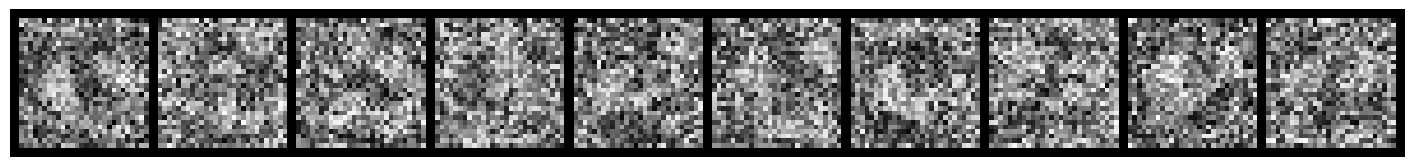

0 0.9977679252624512
1 0.9959120750427246
2 0.9998168349266052
3 0.9999963045120239
4 0.9995678067207336
5 0.9993836879730225
6 0.9996600151062012
7 0.9997488856315613
8 0.9807286858558655
9 0.9969179630279541
Loss: 0.011162415146827698
 


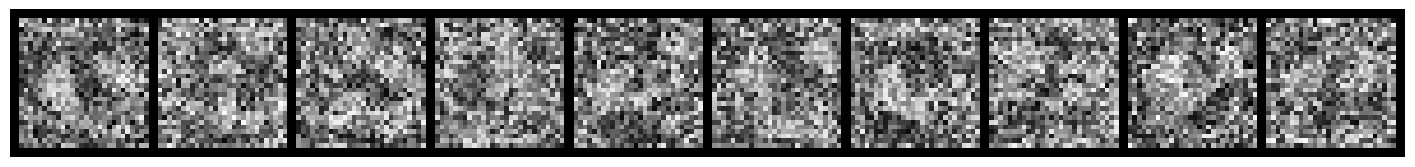

0 0.9992837309837341
1 0.9988095760345459
2 0.9999476671218872
3 0.999998927116394
4 0.9999278783798218
5 0.9997182488441467
6 0.9999107122421265
7 0.9999343156814575
8 0.9937602877616882
9 0.9987115859985352
Loss: 0.0030703984666615725
 


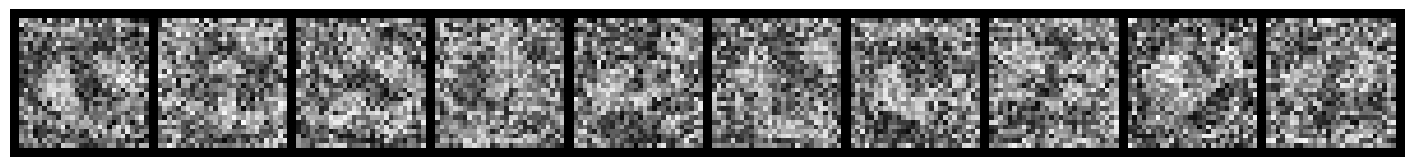

0 0.9997335076332092
1 0.9995855689048767
2 0.9999819993972778
3 0.9999997615814209
4 0.9999854564666748
5 0.9998610019683838
6 0.9999724626541138
7 0.9999796152114868
8 0.9976224303245544
9 0.9994325041770935
Loss: 0.001001844764687121
 


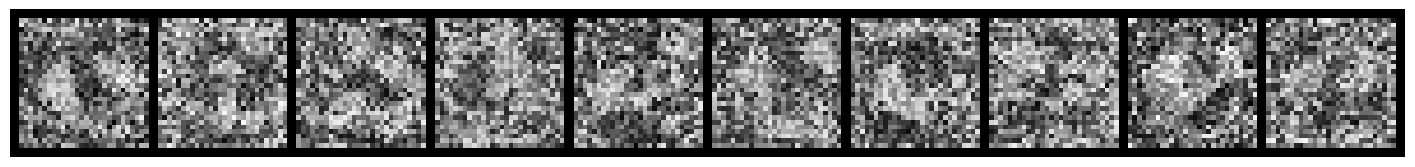

0 0.9998865127563477
1 0.9998376369476318
2 0.999993085861206
3 0.9999997615814209
4 0.9999964237213135
5 0.9999253749847412
6 0.9999899864196777
7 0.999992847442627
8 0.9989786148071289
9 0.9997264742851257
Loss: 0.00038487621350213885
 


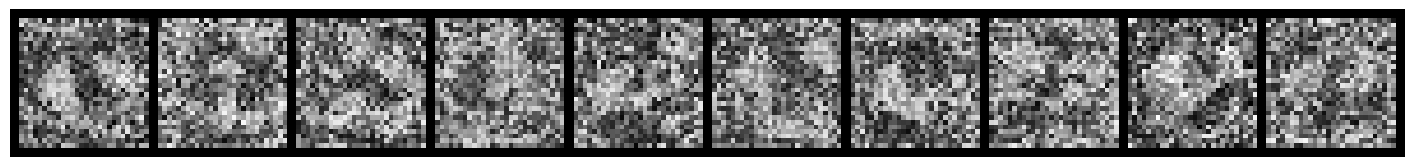

0 0.999947190284729
1 0.9999300241470337
2 0.9999970197677612
3 1.0
4 0.999998927116394
5 0.9999568462371826
6 0.9999958276748657
7 0.9999972581863403
8 0.9995309114456177
9 0.9998573064804077
Loss: 0.0001673831429798156
 


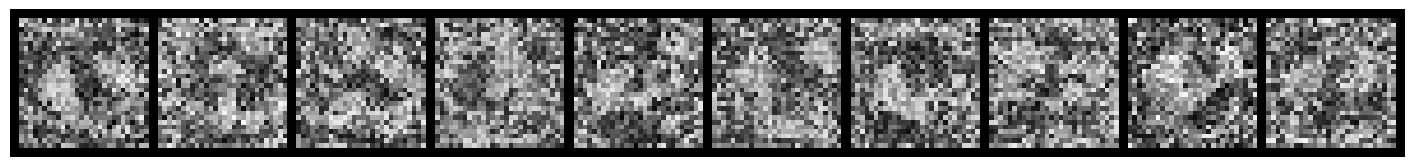

0 0.9999734163284302
1 0.9999674558639526
2 0.9999985694885254
3 1.0
4 0.9999996423721313
5 0.9999732971191406
6 0.9999980926513672
7 0.9999988079071045
8 0.9997698664665222
9 0.9999179840087891
Loss: 7.888019899837673e-05
 


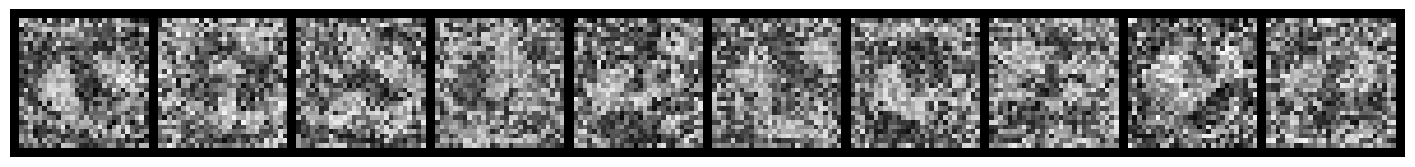

0 0.9999854564666748
1 0.9999837875366211
2 0.9999992847442627
3 1.0
4 0.9999998807907104
5 0.9999825954437256
6 0.9999990463256836
7 0.9999995231628418
8 0.9998807907104492
9 0.9999510049819946
Loss: 4.0289633034262806e-05
 


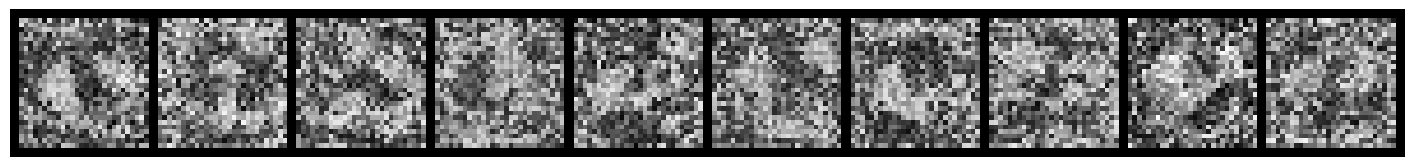

0 0.9999916553497314
1 0.9999912977218628
2 0.9999995231628418
3 1.0
4 1.0
5 0.9999881982803345
6 0.9999995231628418
7 0.9999997615814209
8 0.9999346733093262
9 0.9999691247940063
Loss: 2.186211531807203e-05
 


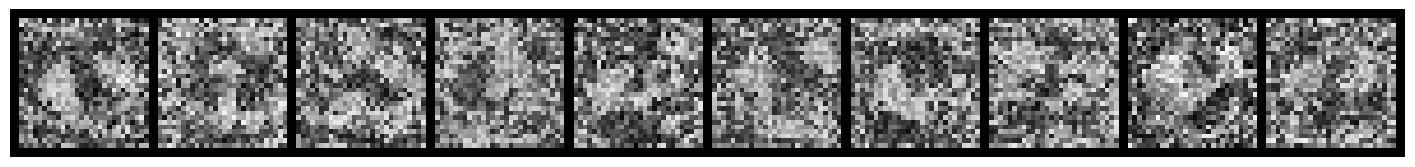

0 0.9999949932098389
1 0.9999951124191284
2 0.9999997615814209
3 1.0
4 1.0
5 0.9999914169311523
6 0.9999997615814209
7 0.9999997615814209
8 0.9999622106552124
9 0.9999798536300659
Loss: 1.2623988368432038e-05
 


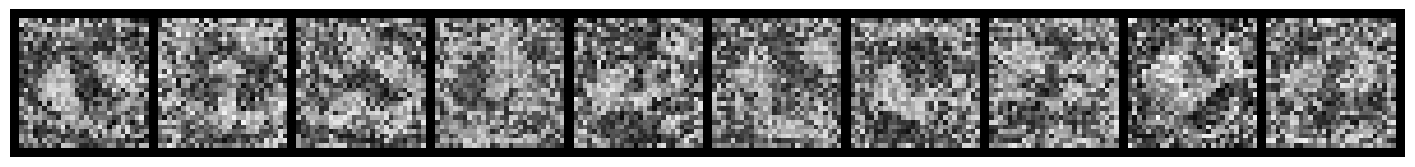

0 0.9999967813491821
1 0.9999970197677612
2 0.9999998807907104
3 1.0
4 1.0
5 0.9999936819076538
6 0.9999998807907104
7 1.0
8 0.9999769926071167
9 0.9999862909317017
Loss: 7.712743354204576e-06
 


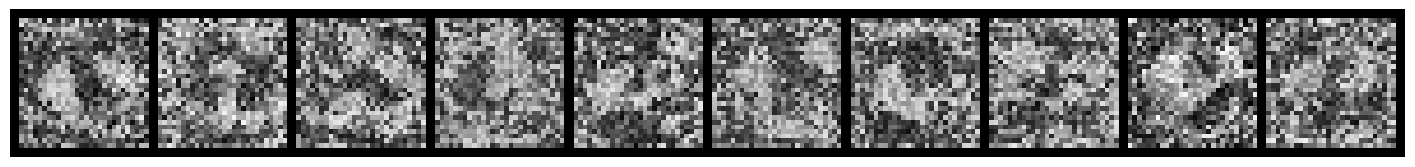

0 0.9999979734420776
1 0.9999980926513672
2 0.9999998807907104
3 1.0
4 1.0
5 0.9999953508377075
6 0.9999998807907104
7 1.0
8 0.9999853372573853
9 0.9999904632568359
Loss: 4.947146408085246e-06
 


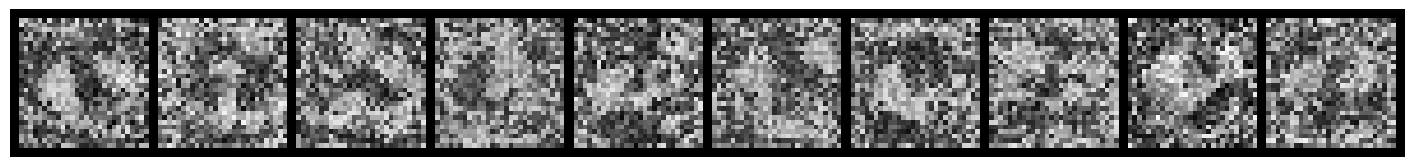

0 0.9999986886978149
1 0.9999988079071045
2 1.0
3 1.0
4 1.0
5 0.9999964237213135
6 0.9999998807907104
7 1.0
8 0.9999903440475464
9 0.999993085861206
Loss: 3.302080131106777e-06
 


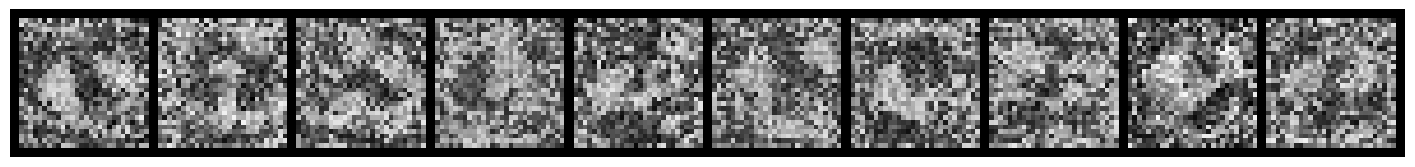

0 0.9999990463256836
1 0.9999991655349731
2 1.0
3 1.0
4 1.0
5 0.9999971389770508
6 1.0
7 1.0
8 0.9999932050704956
9 0.9999947547912598
Loss: 2.2768895178160165e-06
 


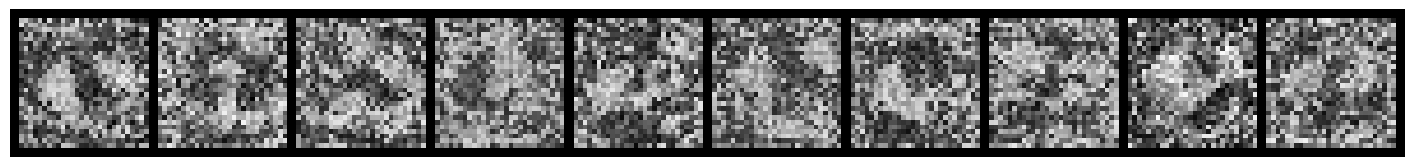

0 0.9999992847442627
1 0.9999992847442627
2 1.0
3 1.0
4 1.0
5 0.999997615814209
6 1.0
7 1.0
8 0.999995231628418
9 0.9999959468841553
Loss: 1.6689260746716172e-06
 


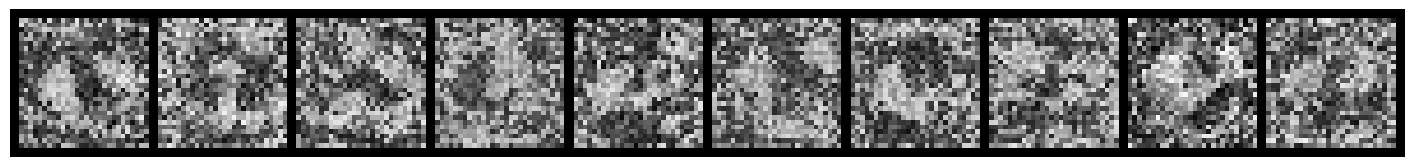

0 0.9999995231628418
1 0.9999995231628418
2 1.0
3 1.0
4 1.0
5 0.9999980926513672
6 1.0
7 1.0
8 0.9999964237213135
9 0.9999967813491821
Loss: 1.263616240976262e-06
 


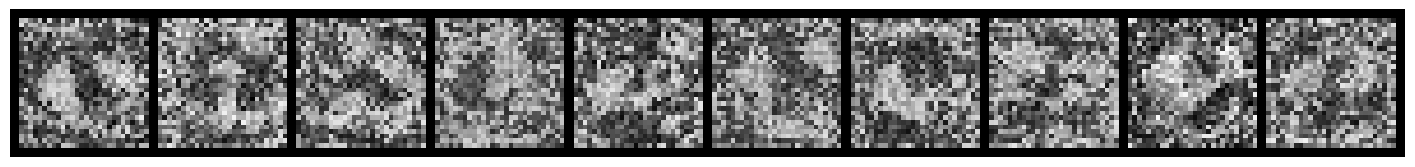

0 0.9999996423721313
1 0.9999996423721313
2 1.0
3 1.0
4 1.0
5 0.9999983310699463
6 1.0
7 1.0
8 0.9999972581863403
9 0.9999974966049194
Loss: 9.655939265940106e-07
 


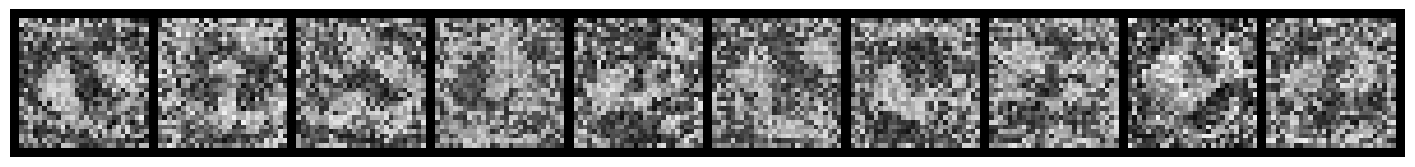

0 0.9999996423721313
1 0.9999997615814209
2 1.0
3 1.0
4 1.0
5 0.9999985694885254
6 1.0
7 1.0
8 0.9999978542327881
9 0.9999979734420776
Loss: 7.629386118424009e-07
 


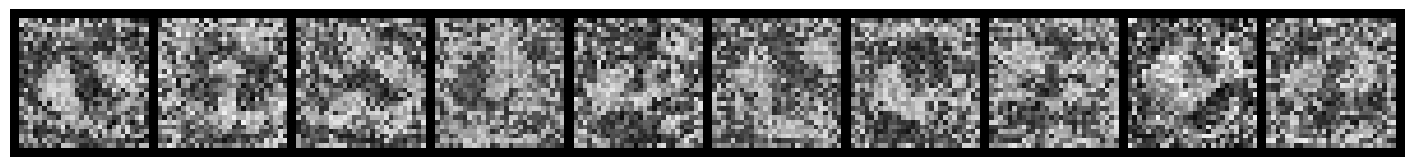

0 0.9999996423721313
1 0.9999998807907104
2 1.0
3 1.0
4 1.0
5 0.9999988079071045
6 1.0
7 1.0
8 0.9999984502792358
9 0.9999982118606567
Loss: 6.198877713359252e-07
 


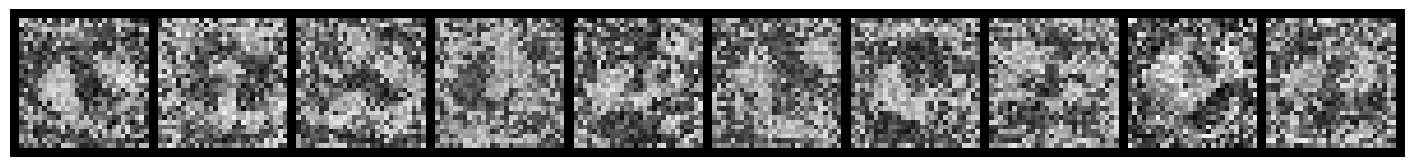

0 0.9999997615814209
1 0.9999998807907104
2 1.0
3 1.0
4 1.0
5 0.999998927116394
6 1.0
7 1.0
8 0.9999988079071045
9 0.9999985694885254
Loss: 5.006786523154005e-07
 


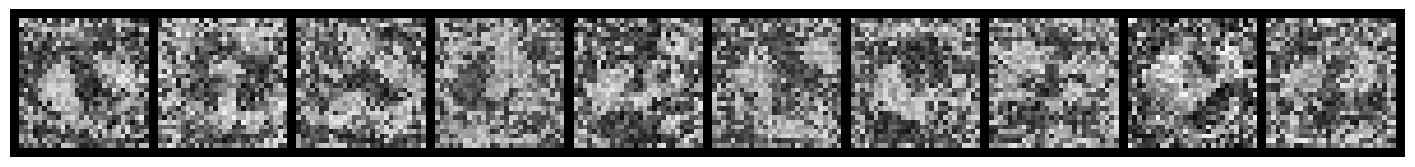

0 0.9999998807907104
1 0.9999998807907104
2 1.0
3 1.0
4 1.0
5 0.9999990463256836
6 1.0
7 1.0
8 0.999998927116394
9 0.9999986886978149
Loss: 4.053113684676646e-07
 


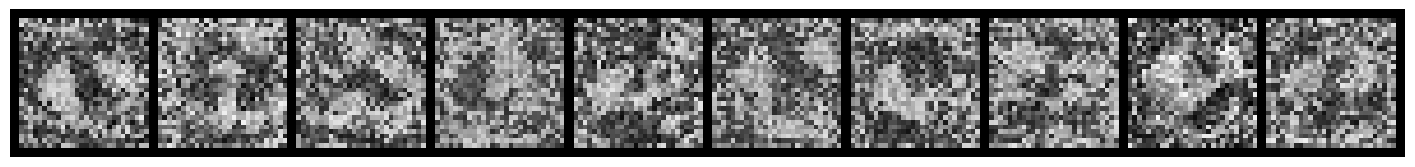

0 0.9999998807907104
1 0.9999998807907104
2 1.0
3 1.0
4 1.0
5 0.9999991655349731
6 1.0
7 1.0
8 0.9999991655349731
9 0.999998927116394
Loss: 3.5762769812208717e-07
 


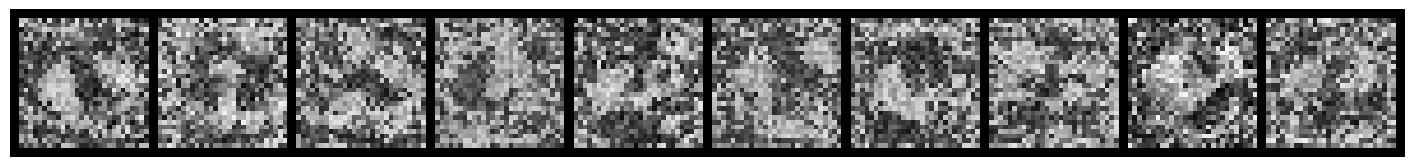

0 0.9999998807907104
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999992847442627
6 1.0
7 1.0
8 0.9999992847442627
9 0.9999990463256836
Loss: 2.9802308176840597e-07
 


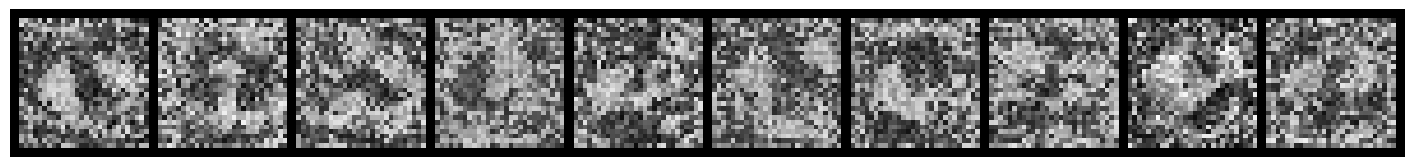

0 0.9999998807907104
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999992847442627
6 1.0
7 1.0
8 0.9999994039535522
9 0.9999991655349731
Loss: 2.5033941142282856e-07
 


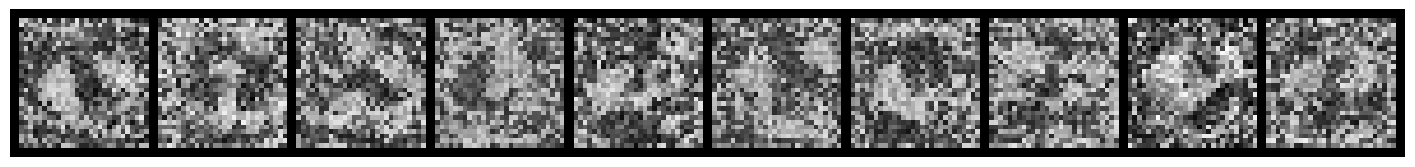

0 0.9999998807907104
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999994039535522
6 1.0
7 1.0
8 0.9999994039535522
9 0.9999991655349731
Loss: 2.2649756203918514e-07
 


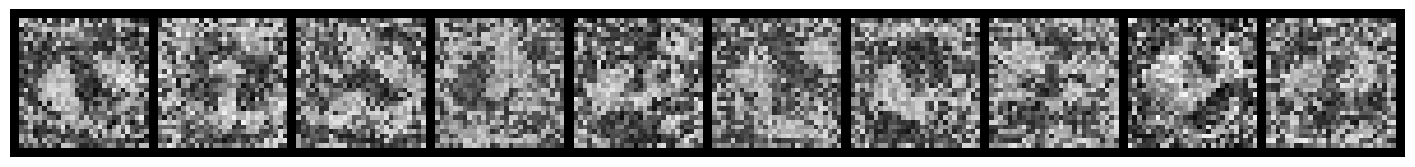

0 0.9999998807907104
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999994039535522
6 1.0
7 1.0
8 0.9999995231628418
9 0.9999994039535522
Loss: 2.145766586636455e-07
 


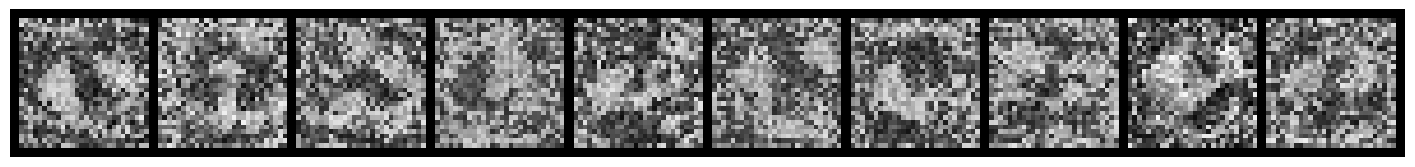

0 0.9999998807907104
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999994039535522
6 1.0
7 1.0
8 0.9999995231628418
9 0.9999994039535522
Loss: 1.7881389169360773e-07
 


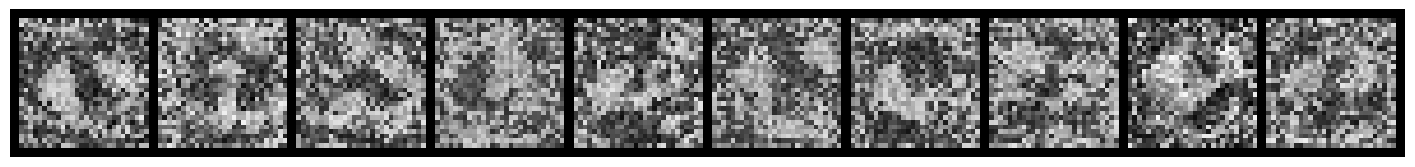

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999995231628418
6 1.0
7 1.0
8 0.9999995231628418
9 0.9999994039535522
Loss: 1.7881389169360773e-07
 


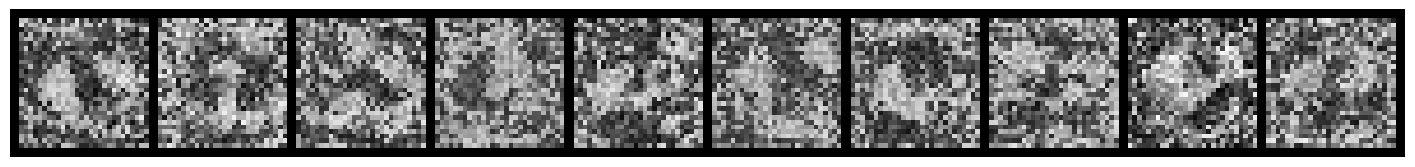

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999995231628418
6 1.0
7 1.0
8 0.9999995231628418
9 0.9999995231628418
Loss: 1.549720280991096e-07
 


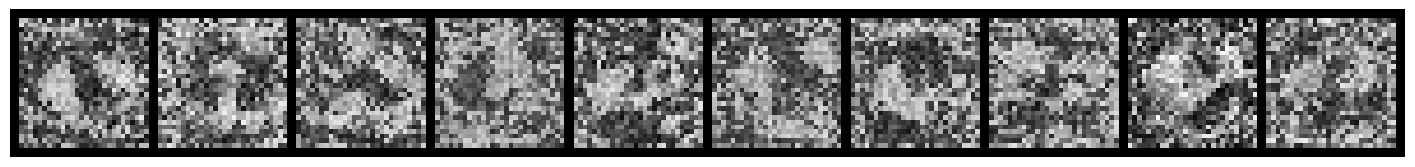

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999995231628418
6 1.0
7 1.0
8 0.9999995231628418
9 0.9999995231628418
Loss: 1.4305111051271524e-07
 


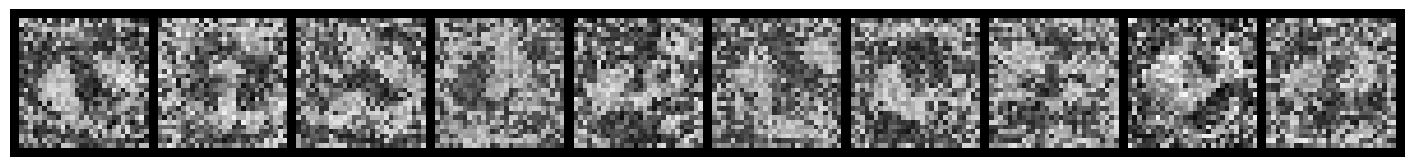

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999995231628418
6 1.0
7 1.0
8 0.9999995231628418
9 0.9999995231628418
Loss: 1.4305111051271524e-07
 


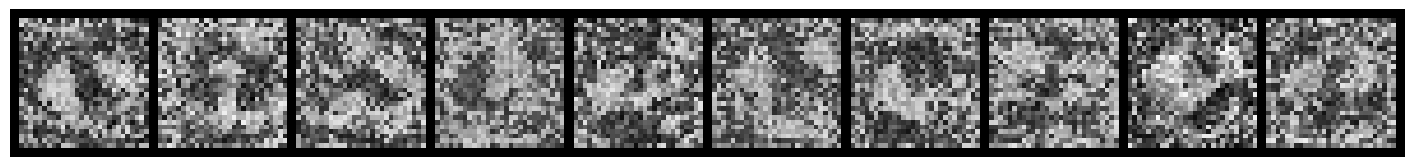

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999995231628418
6 1.0
7 1.0
8 0.9999997615814209
9 0.9999995231628418
Loss: 1.4305111051271524e-07
 


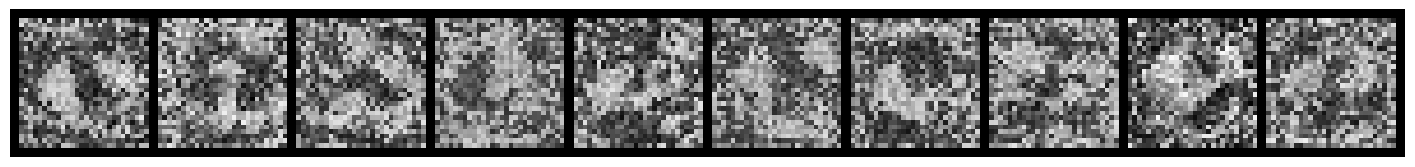

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999996423721313
6 1.0
7 1.0
8 0.9999997615814209
9 0.9999995231628418
Loss: 1.1920926823449918e-07
 


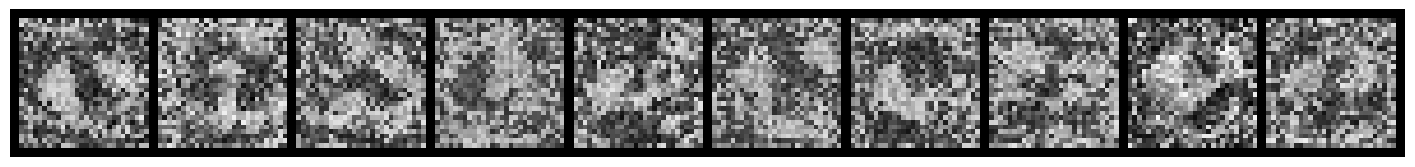

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999996423721313
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999995231628418
Loss: 1.0728833643725011e-07
 


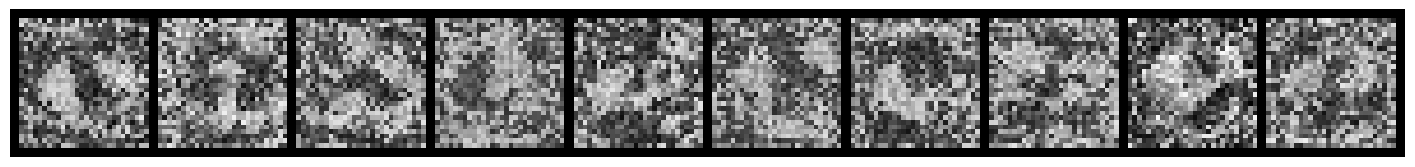

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999996423721313
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 9.53674117454284e-08
 


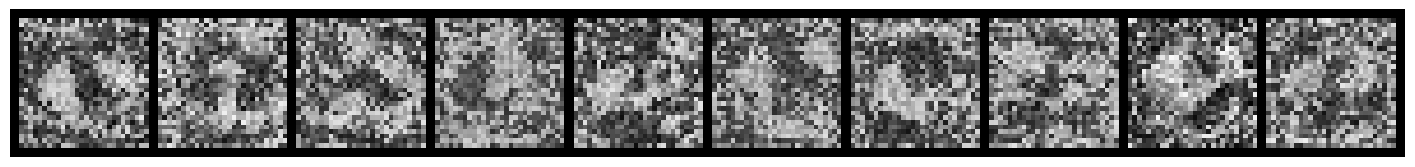

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999996423721313
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 8.344649415903405e-08
 


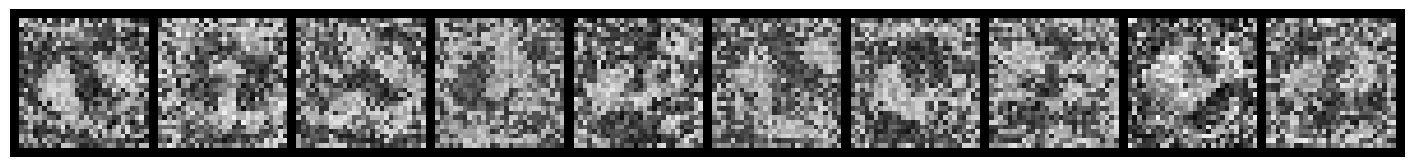

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999996423721313
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 8.344649415903405e-08
 


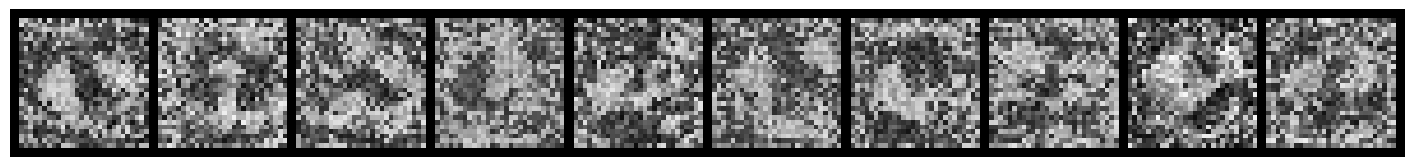

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999996423721313
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 8.344649415903405e-08
 


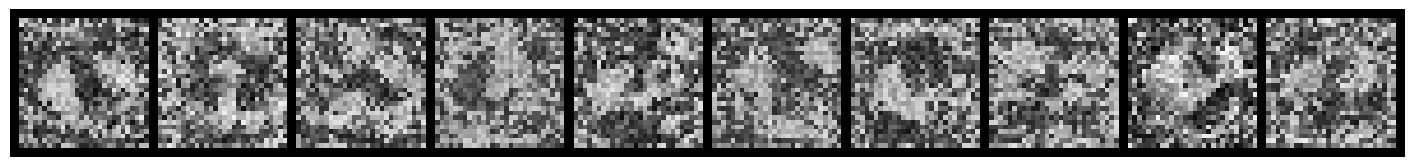

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999996423721313
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 8.344649415903405e-08
 


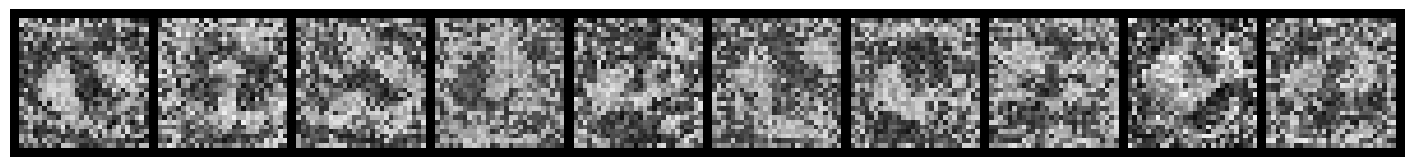

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999996423721313
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 8.344649415903405e-08
 


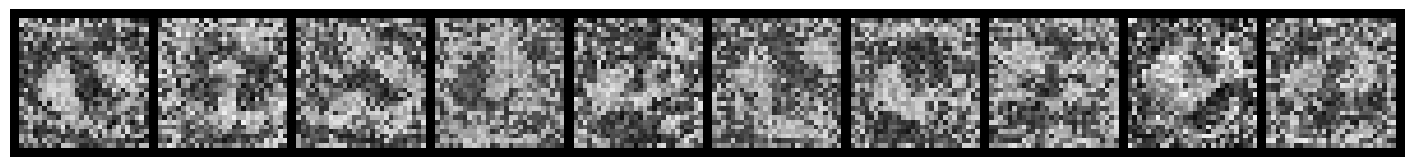

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999996423721313
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 8.344649415903405e-08
 


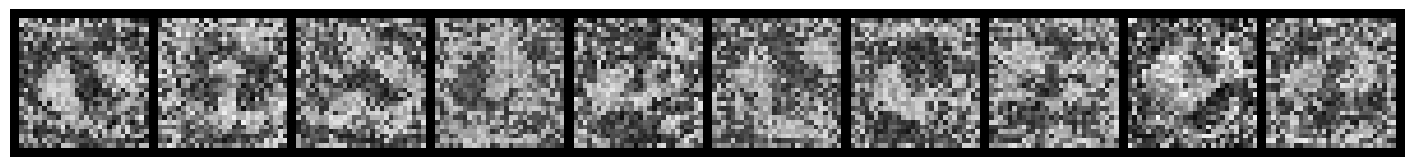

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999996423721313
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 8.344649415903405e-08
 


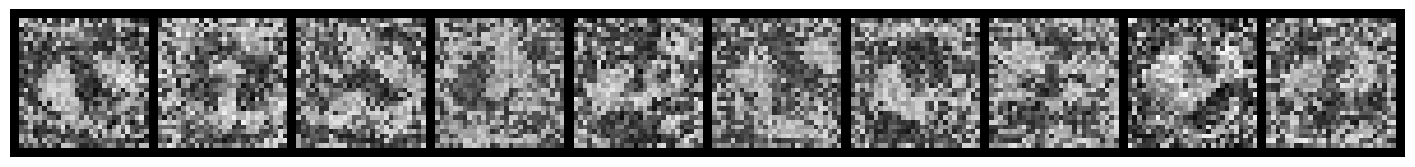

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999996423721313
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 8.344649415903405e-08
 


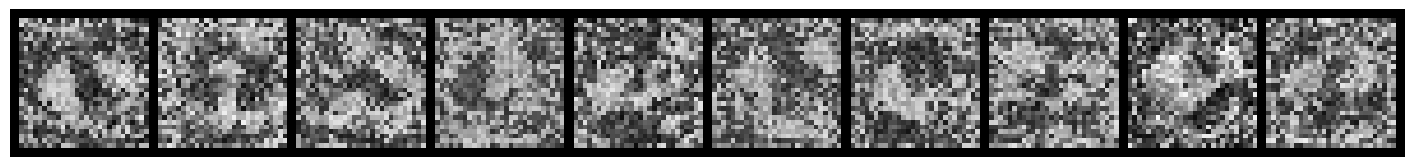

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999996423721313
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 8.344649415903405e-08
 


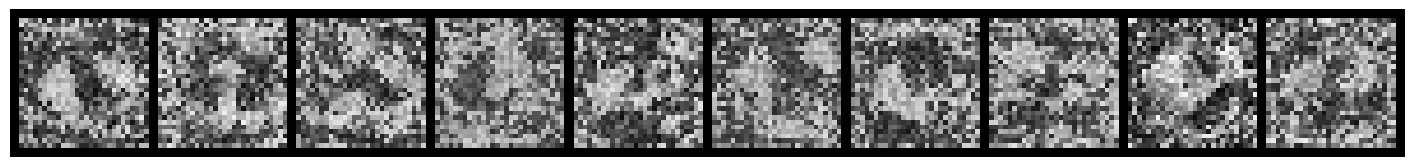

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999996423721313
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 8.344649415903405e-08
 


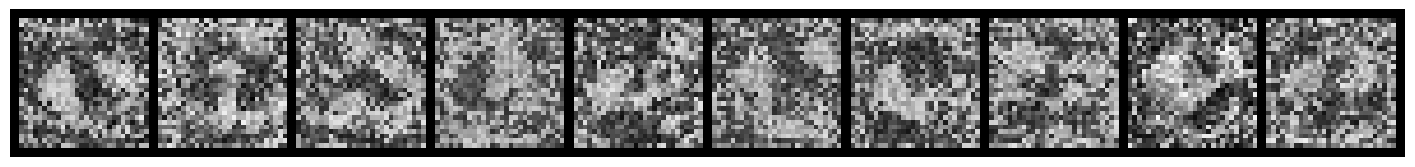

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999996423721313
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 8.344649415903405e-08
 


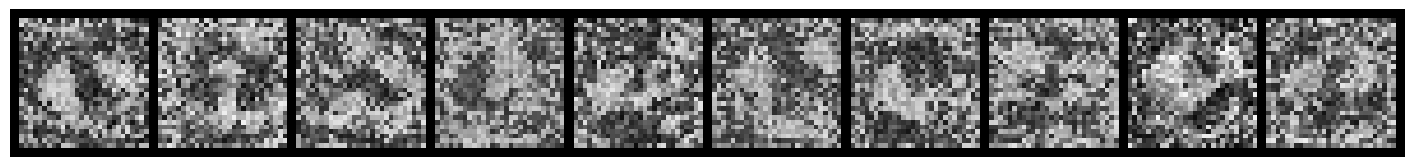

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999996423721313
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 8.344649415903405e-08
 


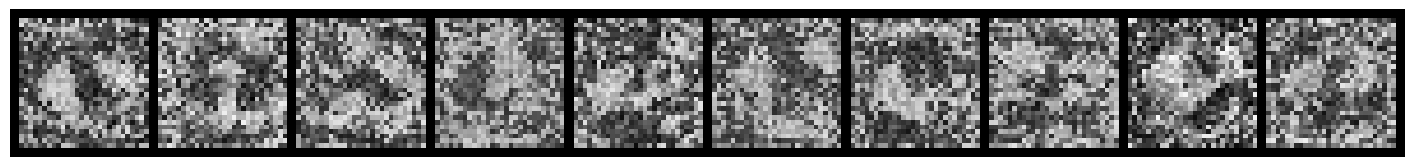

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 8.344649415903405e-08
 


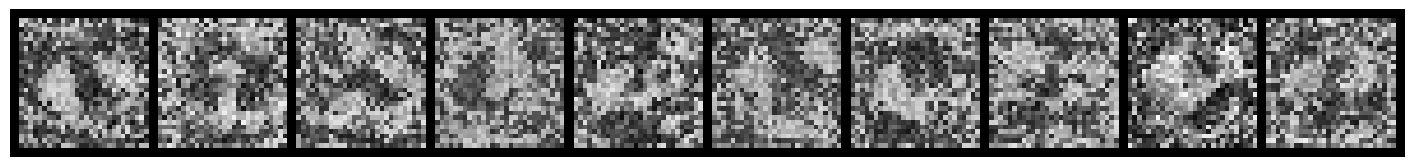

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


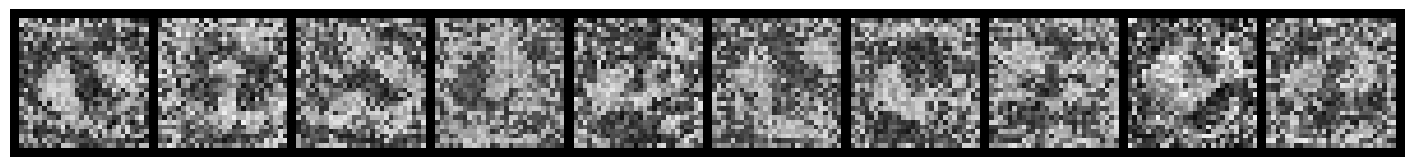

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


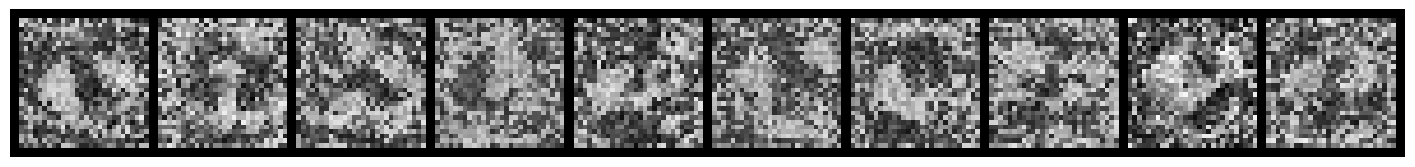

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


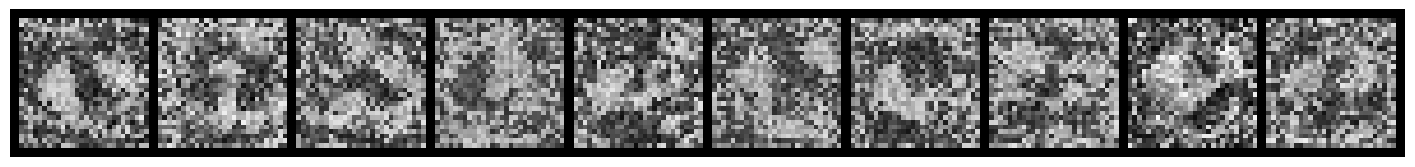

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


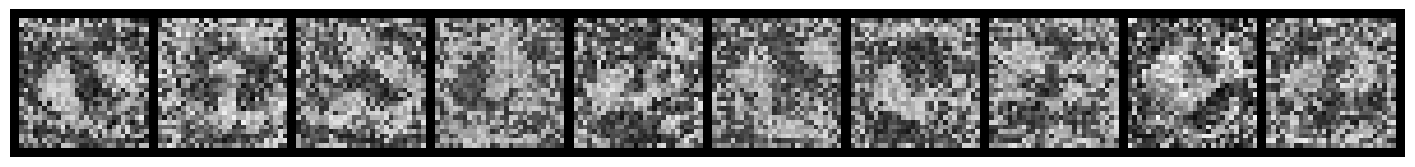

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


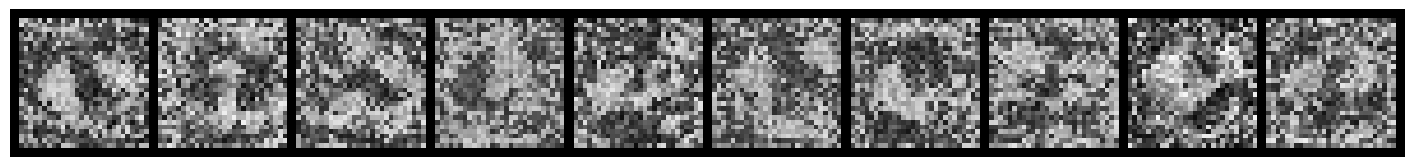

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


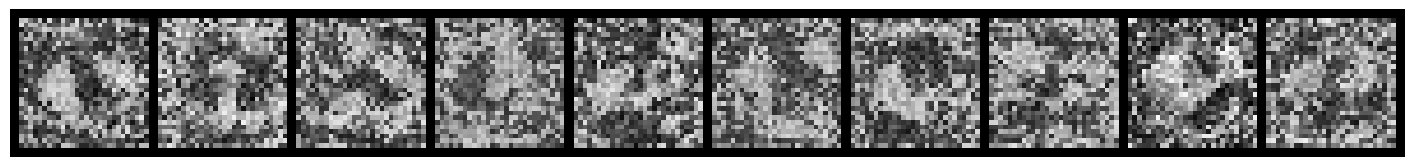

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


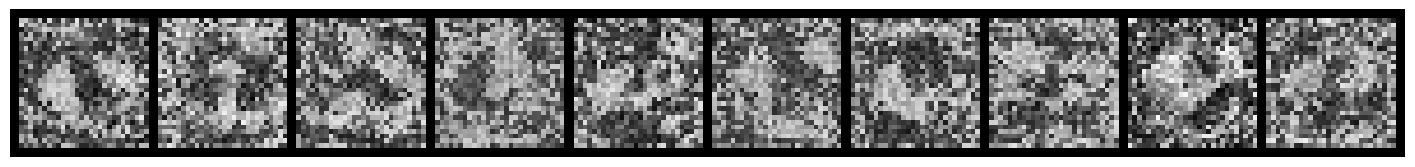

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


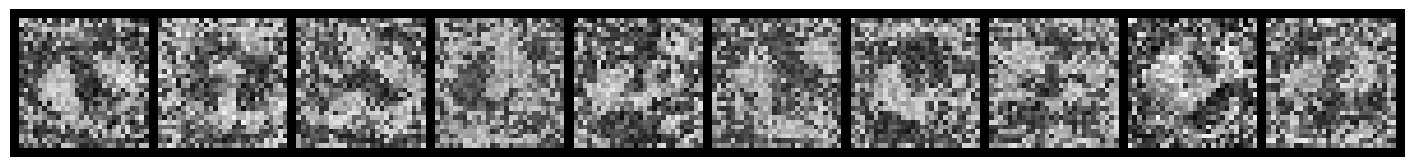

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


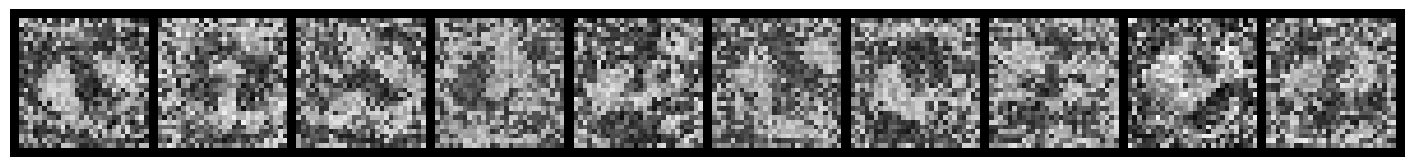

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


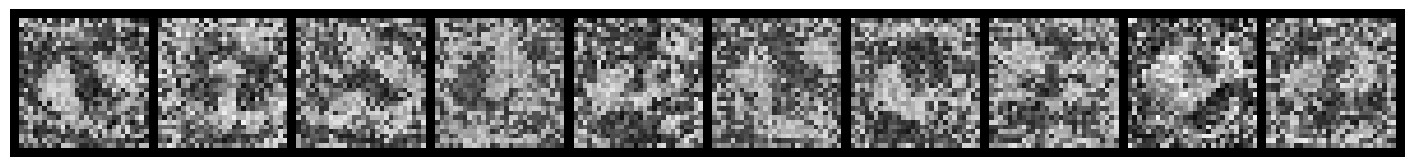

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


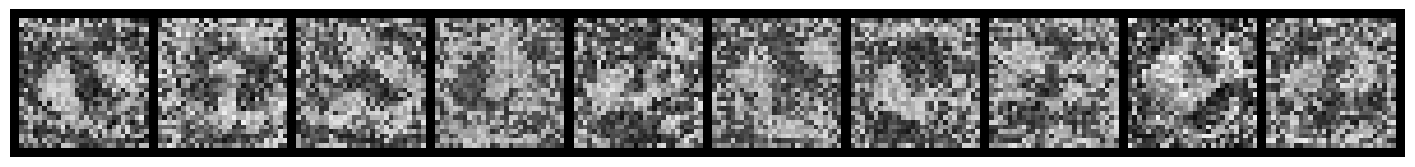

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


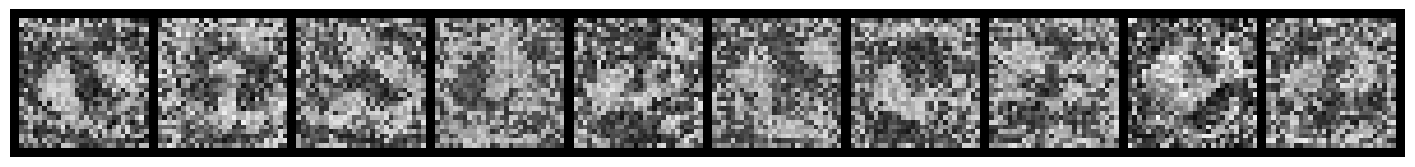

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


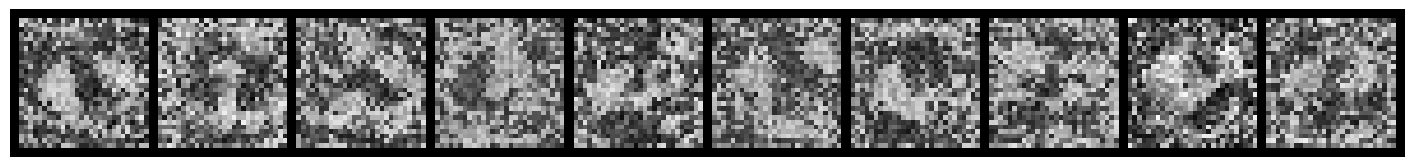

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


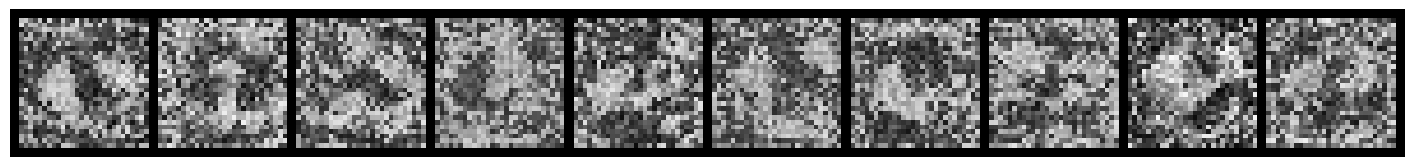

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


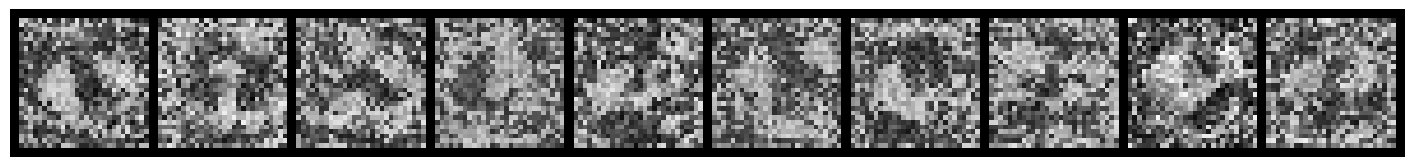

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


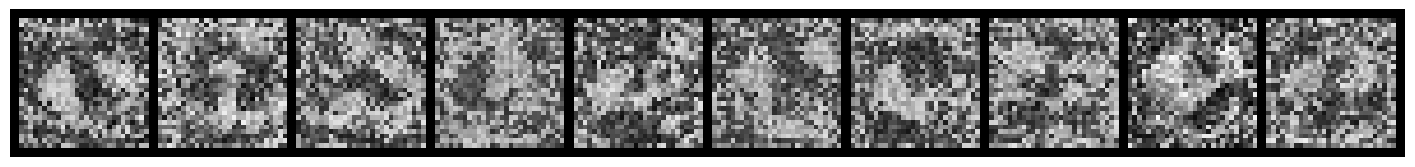

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


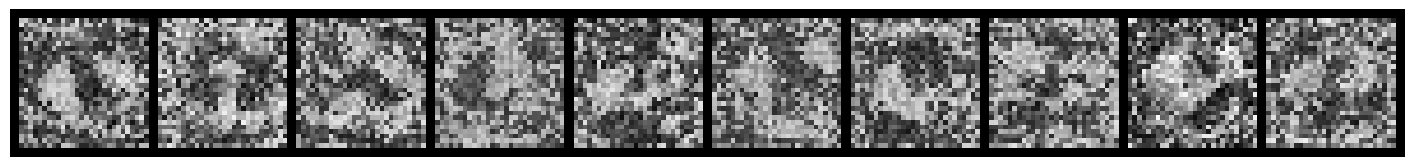

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


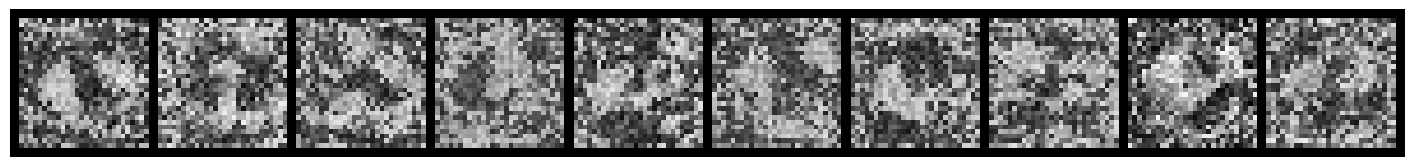

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


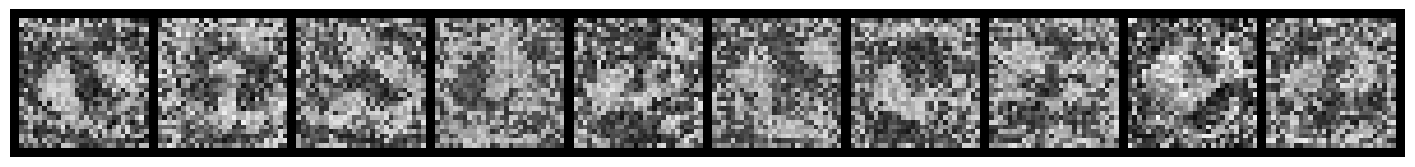

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


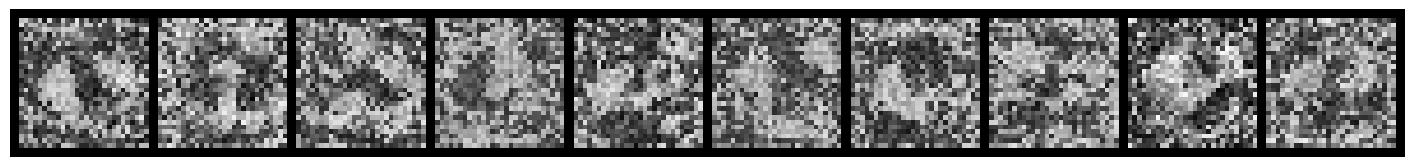

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


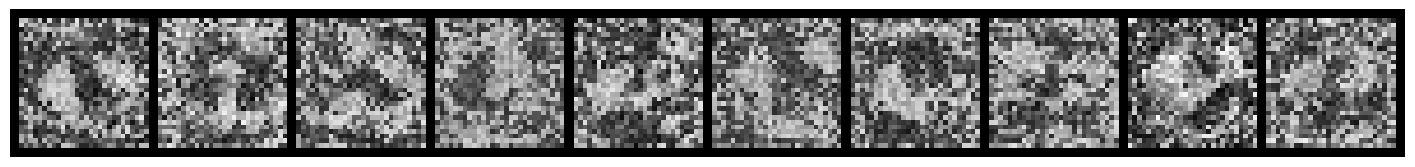

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


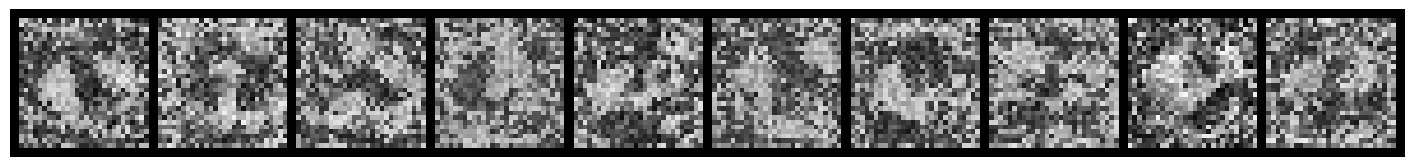

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


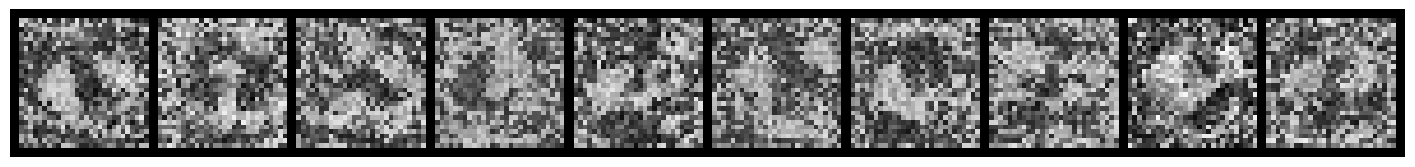

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


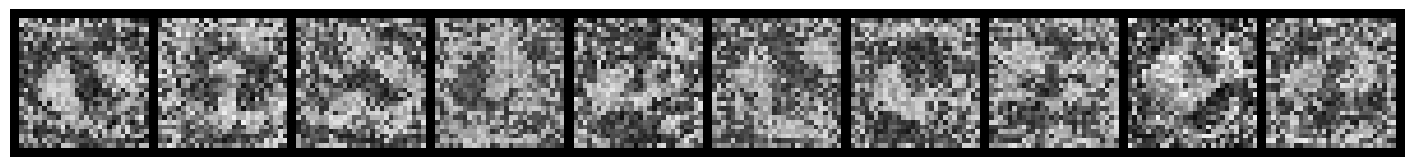

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


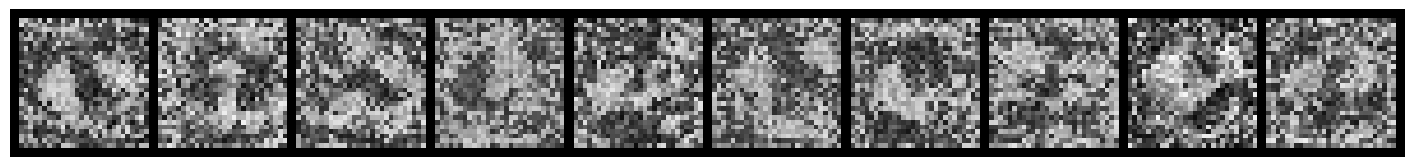

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


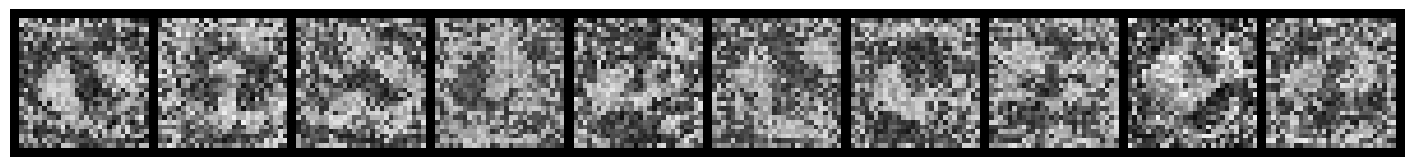

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


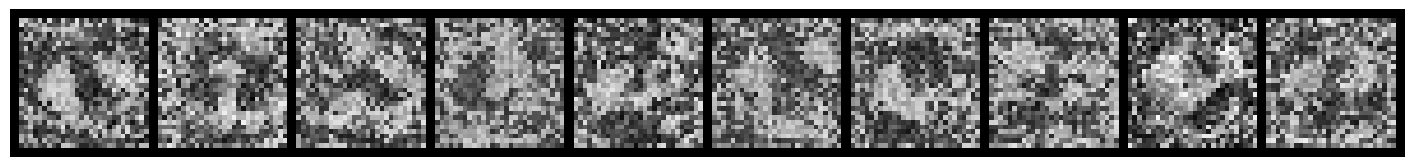

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


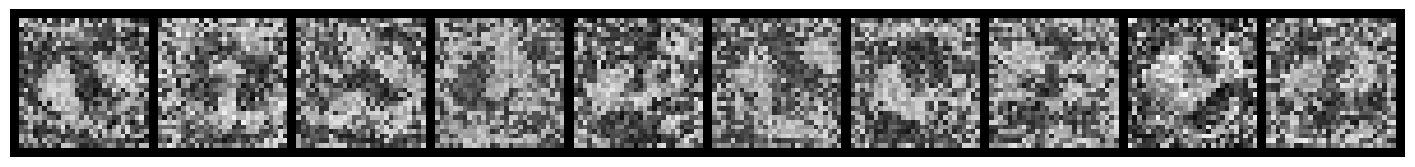

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


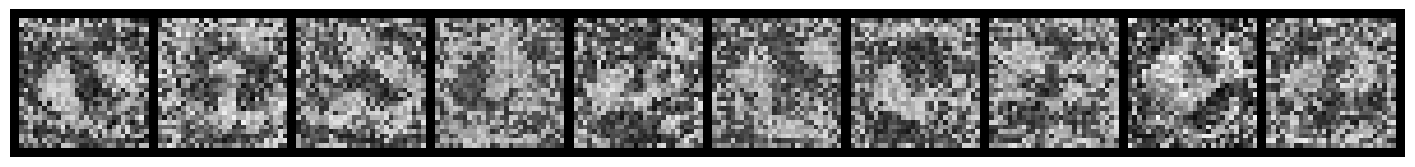

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


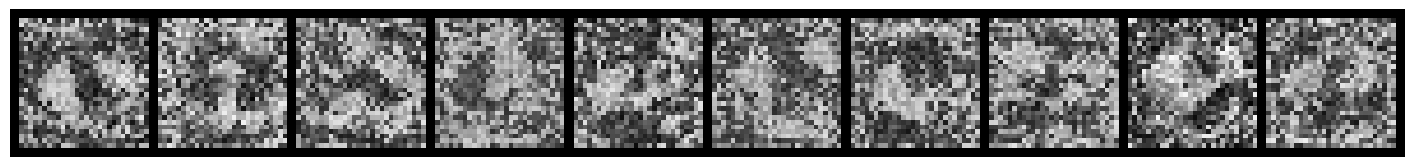

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


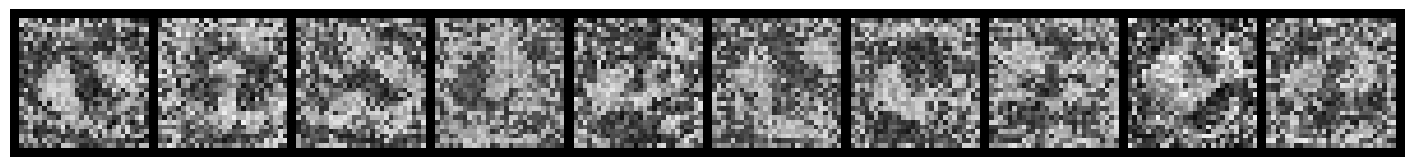

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


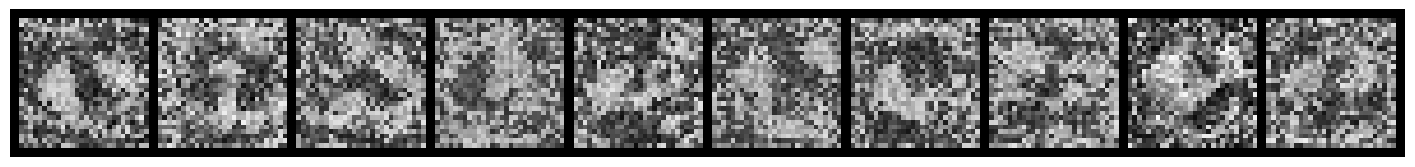

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


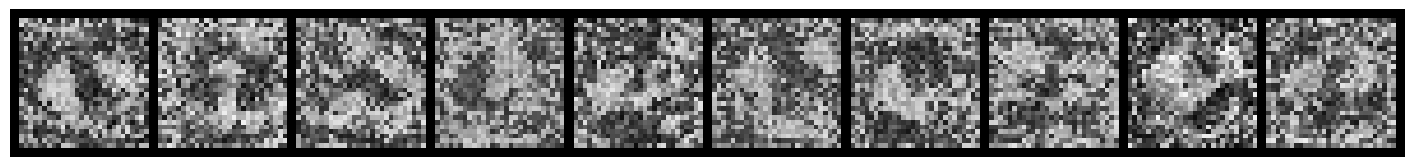

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


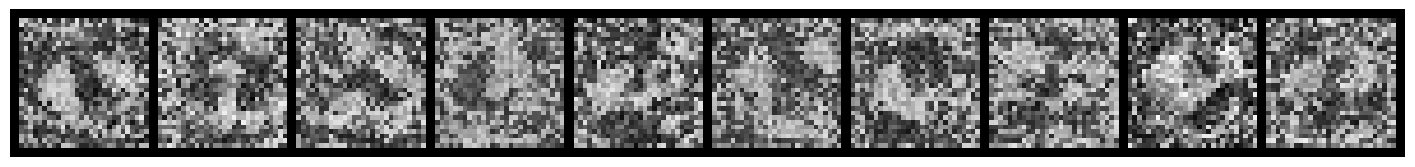

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


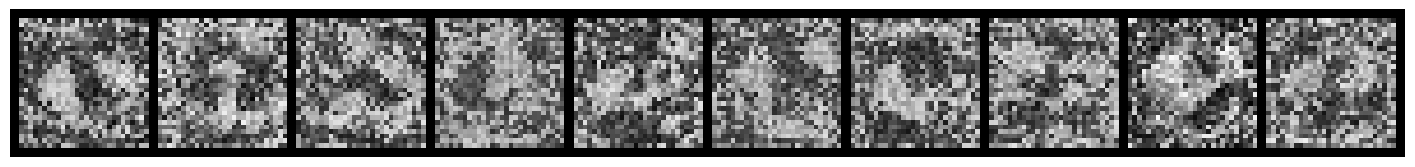

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


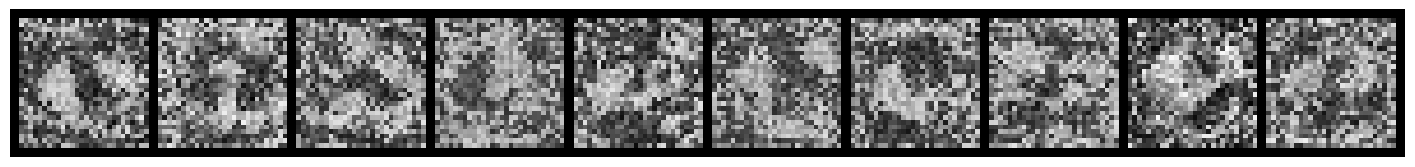

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


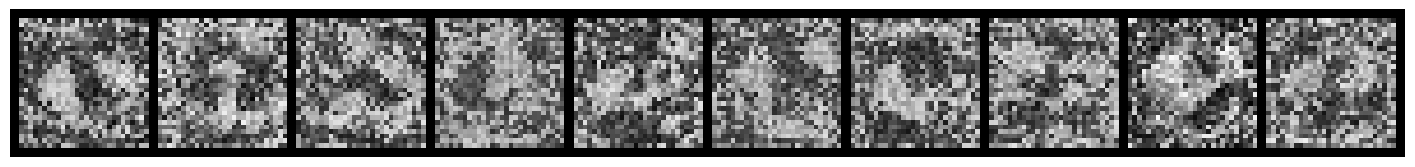

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


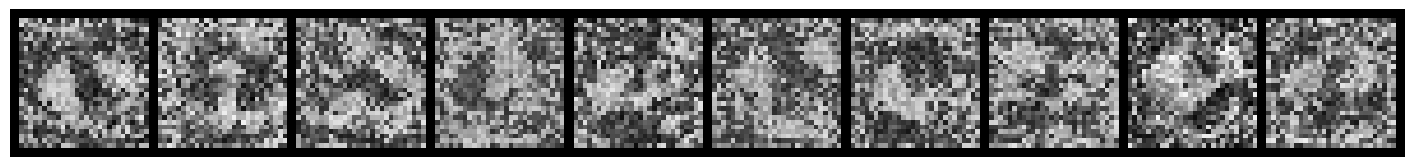

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


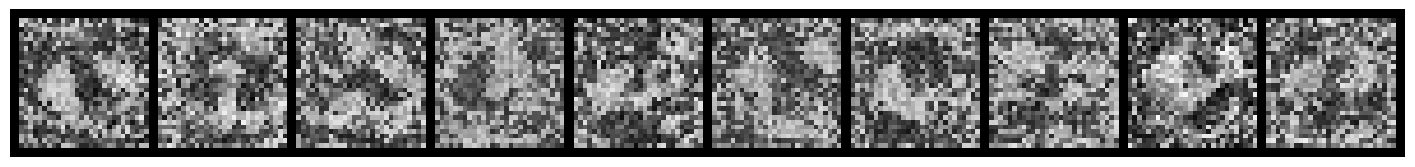

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


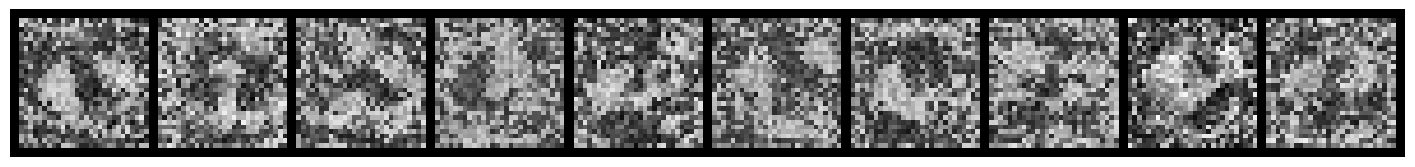

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


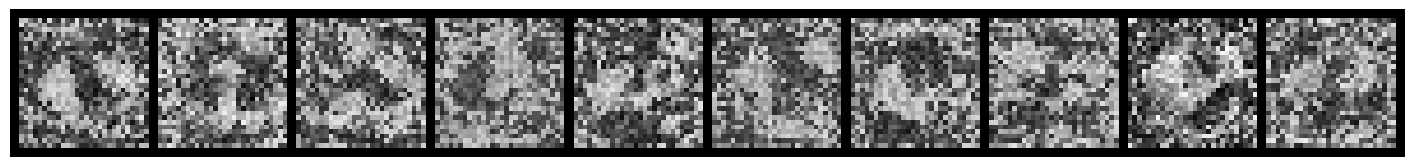

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


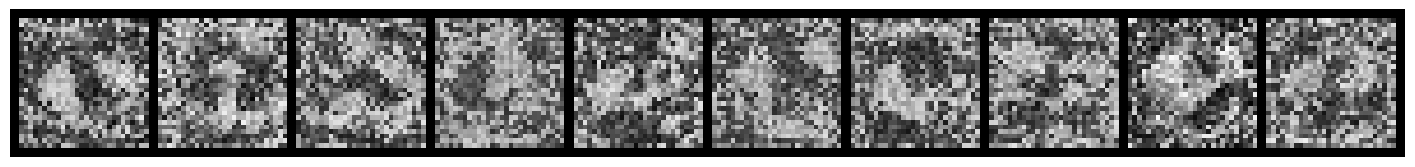

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


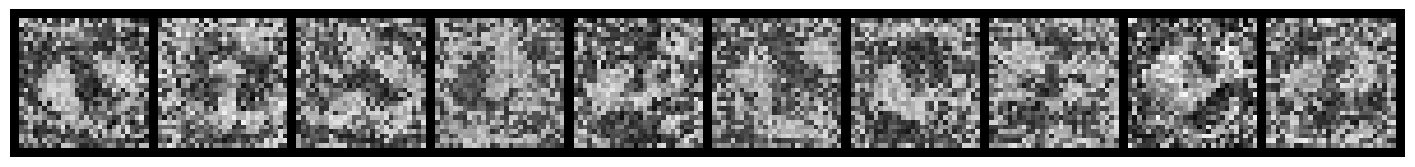

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


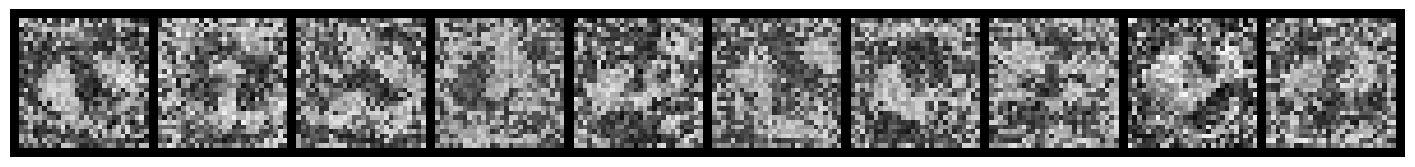

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


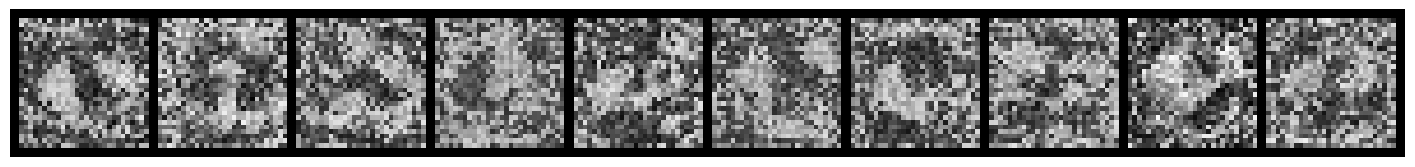

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


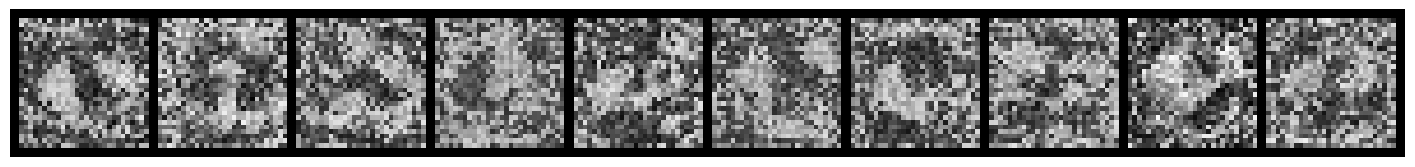

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


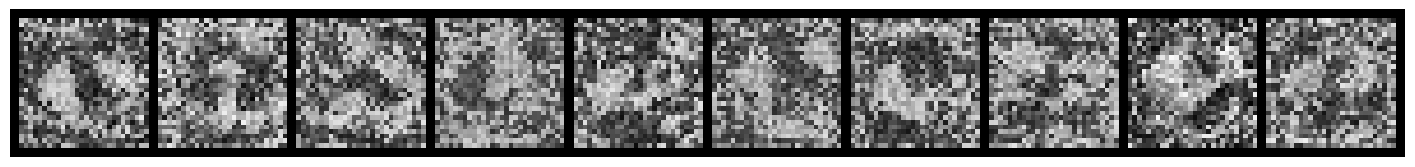

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


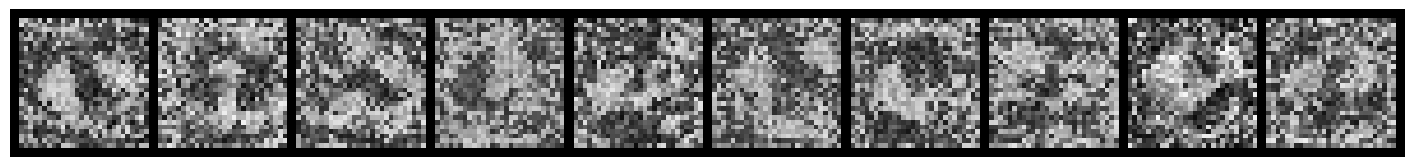

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.9999997615814209
6 1.0
7 1.0
8 0.9999998807907104
9 0.9999996423721313
Loss: 7.152556236178498e-08
 


In [13]:
images.requires_grad=True



import time
# Start timing
start_time = time.time()


# Define optimizer
optimizer = torch.optim.Adam([images], lr=0.1)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()

    logits  = net(images.to(device))
    loss = criterion(logits, targets)

    loss.backward()
    optimizer.step()

    grid = make_grid(images, nrow=10, padding=2, normalize=True)
    plt.figure(figsize=(18, 3))
    plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap='gray')
    plt.axis('off')
    plt.show()


    probs = F.softmax(net(images.to(device)), dim=1).cpu()

    for i in range(10):
        print(i, probs[i, i].item())

    print(f"Loss: {loss.item()}")
    print(" ")



# Zadanie 3 (część 1)

Im większy parametr lambda, tym mniejsze prawdopodobieństwa są przypisywane do odpowiednich cyfr, ale cyfry zdają się łatwiejsze do zauważenia dla ludzkiego oka.

 
Lambda L2: 0


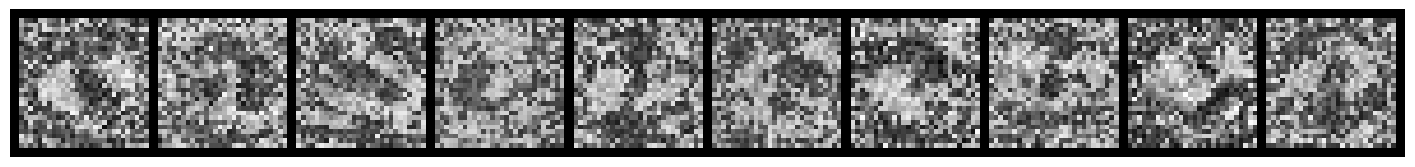

0 0.9999998807907104
1 0.9999990463256836
2 1.0
3 1.0
4 1.0
5 0.9999998807907104
6 1.0
7 1.0
8 1.0
9 0.9999998807907104
 
Lambda L2: 0.001


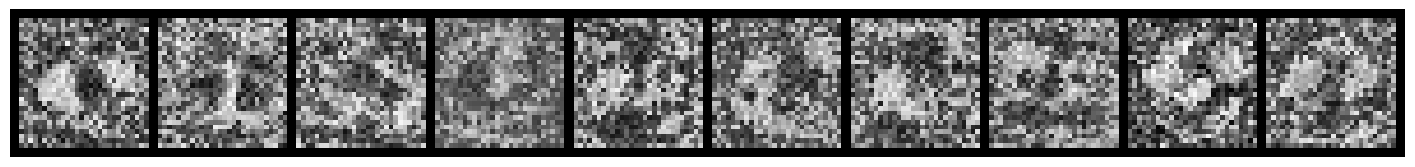

0 0.9999996423721313
1 0.9999977350234985
2 0.9999998807907104
3 1.0
4 1.0
5 0.9999996423721313
6 0.9999997615814209
7 1.0
8 0.9999985694885254
9 0.9999948740005493
 
Lambda L2: 0.01


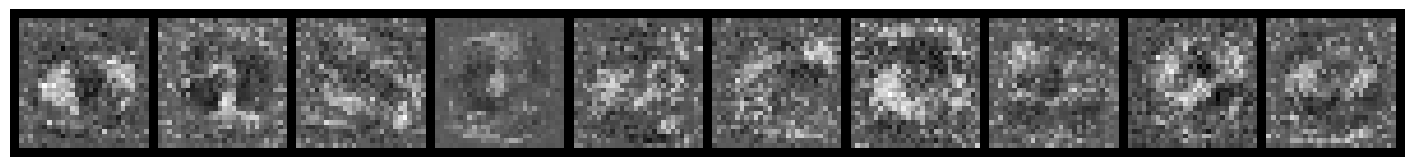

0 0.9999411106109619
1 0.9999462366104126
2 0.9999674558639526
3 0.9999746084213257
4 0.9999879598617554
5 0.999968409538269
6 0.9999713897705078
7 0.9999586343765259
8 0.9999276399612427
9 0.9999585151672363
 
Lambda L2: 0.1


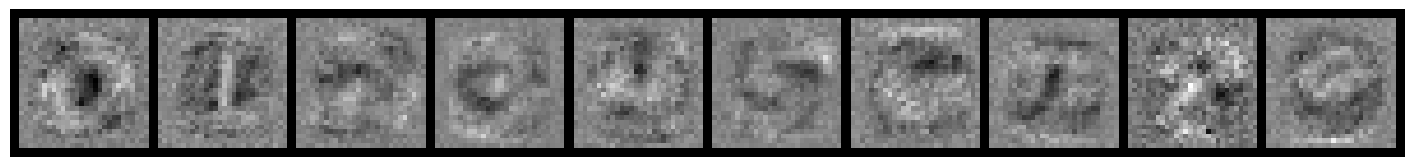

0 0.99953293800354
1 0.9996476173400879
2 0.9997383952140808
3 0.9997707009315491
4 0.9997106194496155
5 0.999790608882904
6 0.99964439868927
7 0.9997005462646484
8 0.9994353652000427
9 0.9996806383132935
 
Lambda L2: 1.0


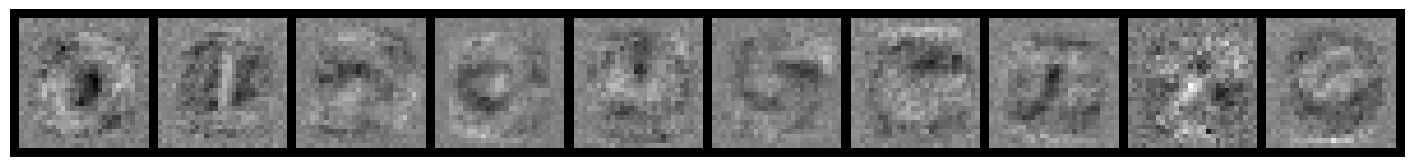

0 0.9963638186454773
1 0.9972217082977295
2 0.9978834986686707
3 0.99817955493927
4 0.9977259039878845
5 0.9983280301094055
6 0.9972047209739685
7 0.9976646900177002
8 0.9956934452056885
9 0.9974949359893799
 
Lambda L2: 10.0


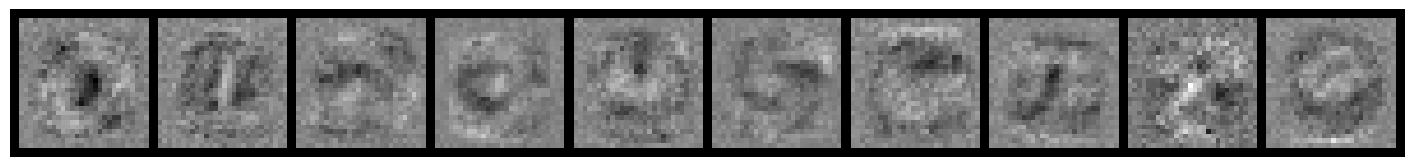

0 0.9740201234817505
1 0.9799492955207825
2 0.9850730299949646
3 0.9866420030593872
4 0.9833643436431885
5 0.9874706864356995
6 0.9789971113204956
7 0.9830896854400635
8 0.9684034585952759
9 0.9816862344741821
 
Lambda L2: 100.0


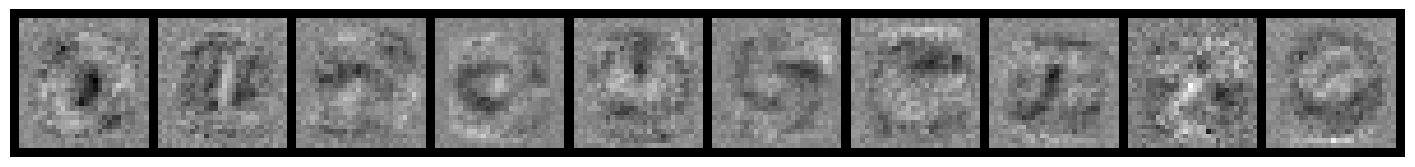

0 0.8298801779747009
1 0.8727650046348572
2 0.8981074094772339
3 0.912771463394165
4 0.8943517208099365
5 0.9136660099029541
6 0.8637526035308838
7 0.8912971615791321
8 0.8081503510475159
9 0.8805814981460571
 
Lambda L2: 1000.0


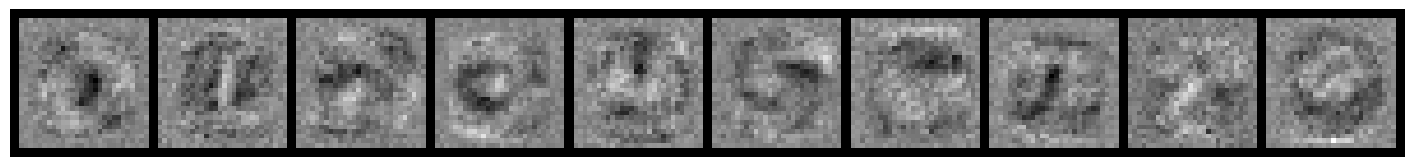

0 0.33361905813217163
1 0.41322171688079834
2 0.5071476101875305
3 0.5633922219276428
4 0.4936635196208954
5 0.5517640709877014
6 0.4049588441848755
7 0.46820229291915894
8 0.3098788559436798
9 0.45470574498176575


In [17]:
for lambda_l2 in [0,0.001,0.01,0.1,1.0,10.0,100.0,1000.0] :
  print(" ")
  print(f"Lambda L2: {lambda_l2}")


  images = torch.rand(10, 1, 28, 28)
  images.requires_grad=True



  import time
  # Start timing
  start_time = time.time()


  # Define optimizer
  optimizer = torch.optim.Adam([images], lr=0.1)

  # Training loop
  num_epochs = 1000
  for epoch in range(num_epochs):
      optimizer.zero_grad()

      logits  = net(images.to(device))
      loss = criterion(logits, targets) + lambda_l2 * images.pow(2).mean()

      loss.backward()
      optimizer.step()


  grid = make_grid(images, nrow=10, padding=2, normalize=True)
  plt.figure(figsize=(18, 3))
  plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap='gray')
  plt.axis('off')
  plt.show()


  probs = F.softmax(net(images.to(device)), dim=1).cpu()

  for i in range(10):
      print(i, probs[i, i].item())


# Zadanie 2 i Zadanie 3 (część 2)

Wygeneruję taki obrazek, że sieć da mu wysokie prawdopodobieństwo że jest trójką i wysokie prawdopodobieństwo że jest czwórką. W tym celu po prostu dodam karę za entropię krzyżową za trójkę i entropię krzyżową za czwórkę. Od razu też rozważam różne parametry lambda.

Lambda L2: 0


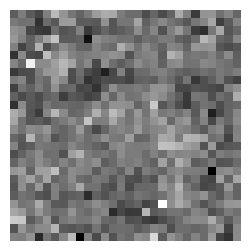

Prob. of 3: 0.4322134256362915
Prob. of 4: 0.5675705075263977
 
Lambda L2: 0.001


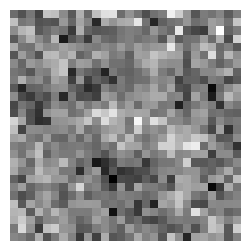

Prob. of 3: 0.5633172392845154
Prob. of 4: 0.4365300238132477
 
Lambda L2: 0.01


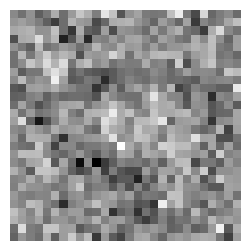

Prob. of 3: 0.5320744514465332
Prob. of 4: 0.46750056743621826
 
Lambda L2: 0.1


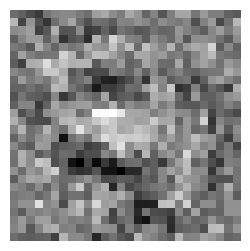

Prob. of 3: 0.49346256256103516
Prob. of 4: 0.5050003528594971
 
Lambda L2: 1.0


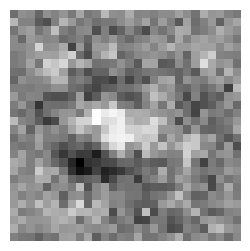

Prob. of 3: 0.4404923617839813
Prob. of 4: 0.5524390339851379
 
Lambda L2: 10.0


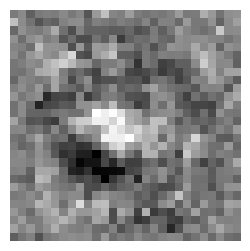

Prob. of 3: 0.36822378635406494
Prob. of 4: 0.5939871072769165
 
Lambda L2: 100.0


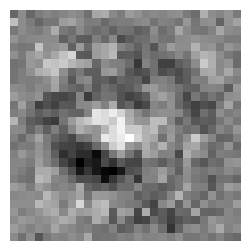

Prob. of 3: 0.5183855891227722
Prob. of 4: 0.2875657081604004
 
Lambda L2: 1000.0


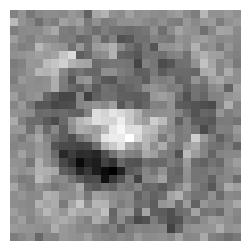

Prob. of 3: 0.2306276112794876
Prob. of 4: 0.18616916239261627
 


In [15]:
for lambda_l2 in [0,0.001,0.01,0.1,1.0,10.0,100.0,1000.0] :

  print(f"Lambda L2: {lambda_l2}")

  images = torch.rand(1, 1, 28, 28)
  images.requires_grad=True

  target1 = torch.tensor([3],
                       dtype=torch.long,
                       device=device)
  target2 = torch.tensor([4],
                       dtype=torch.long,
                       device=device)


  import time
  # Start timing
  start_time = time.time()


  # Define optimizer
  optimizer = torch.optim.Adam([images], lr=0.1)

  # Training loop
  num_epochs = 1000
  for epoch in range(num_epochs):
      optimizer.zero_grad()

      logits  = net(images.to(device))

      loss =  criterion(logits,target1)+criterion(logits,target2)+lambda_l2 * images.pow(2).mean()

      loss.backward()

      optimizer.step()


  grid = make_grid(images, nrow=1, padding=2, normalize=True)
  plt.figure(figsize=(18, 3))
  plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap='gray')
  plt.axis('off')
  plt.show()


  probs = F.softmax(net(images.to(device)), dim=1)



  print(f"Prob. of 3: {probs[0][3].item()}")
  print(f"Prob. of 4: {probs[0][4].item()}")
  print(f" ")